In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [133]:
df=pd.read_csv("skills_data.csv")
df

,username,job_titles,skills
0,%D0%BC%CE%B1%CE%B7%D7%A0%CF%85%CE%B7%CE%B1%D1%...,"[sr. sre,senior site reliability engineer,impl...","[data center architecture,vendor management,wi..."
1,%E0%B2%A8%E0%B2%B5%E0%B3%80%E0%B2%A8%E0%B3%8D-...,"[management trainee human resources,technical ...","[human resources,technical recruiting,strategi..."
2,%E0%B2%AE%E0%B2%82%E0%B2%9C%E0%B3%81%E0%B2%A8%...,[deputy manager - hr],"[human resources (hr),hr policies,human resour..."
3,%E2%97%8F%E0%B9%8B-%C2%A2%D0%BD%D1%94%D1%82%CE...,"[sales manager,area manager,universal banker]","[banking,loans,retail banking,sales operations..."
4,%E2%98%80%EF%B8%8Frohit-kumar-sharma-a1672a94,"[software development engineer ,intern,intern,...","[mvc architecture,php,algorithms,software desi..."
...,...,...,...
995,abinayag,"[consultant|markting research,digital marketin...","[digital marketing,email marketing,search engi..."
996,abinayahai,"[user experience designer,user experience desi...","[design ,user experience (ux),user interface d..."
997,abinayathirumoorthy,"[programmer analyst trainee,intern]","[python (programming language),job control lan..."
998,abir-sengupta-15aa48104,"[assistant manager training,head online traini...","[training delivery,coaching,content developmen..."


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   username    1000 non-null   object
 1   job_titles  1000 non-null   object
 2   skills      1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [135]:
df.isna().sum()

username      0
job_titles    0
skills        0
dtype: int64

# Q1)What are the most popular skills required for the role of a software developer/software engineer?

In [155]:
software=df[df['job_titles'].str.contains('software')]
software

,username,job_titles,skills
4,%E2%98%80%EF%B8%8Frohit-kumar-sharma-a1672a94,"[software development engineer ,intern,intern,...","[mvc architecture,php,algorithms,software desi..."
13,-nitin-,"[senior manager,engineering leader,founder,sen...","[technical project management,engineering mana..."
18,01rajatmalhotra,"[back-end developer,system software engineer]","[node.js,mongodb,amazon web services (aws),obj..."
20,029vaibhav,"[software development engineer i,jr mobile dev...","[spring boot,android development,mongodb,drool..."
21,07rohitkumar,"[engineer 2,software engineering trainee,sde i...","[c++,github,javascript,machine learning,shell ..."
...,...,...,...
963,abhiy13,"[software engineer intern,software engineer in...","[go (programming language),django,mongodb,node..."
967,abhrajitkundu,"[senior product manager,management trainee,sum...","[product management,strategy,requirements gath..."
985,abinash-thakur-929a30106,"[associate software developer,web developer,ju...","[software engineers,backend developer,full-sta..."
988,abinash123,"[problem setter,software engineer - 1,intern,s...","[cloud computing,mongodb,flask,django,node.js,..."


In [156]:
software_corpus = []
for msg in software['skills'].tolist():
    for word in msg.split(sep=','):
        software_corpus.append(word)

In [157]:
software_corpus = ['sql' if item == 'mysql' else item for item in software_corpus]
software_corpus

['[mvc architecture',
 'php',
 'algorithms',
 'software design',
 'html5',
 'jquery',
 'css',
 'laravel',
 'git',
 'matlab',
 'powerpoint',
 'mongodb',
 'aerospike',
 'core java',
 'docker products',
 'solr',
 'redis',
 'memcache',
 'rabbitmq',
 'go (programming language)',
 'apache kafka',
 'c++',
 'sql',
 'java',
 'sql',
 'javascript',
 'microsoft word',
 'data structures',
 'microsoft excel',
 'customer service',
 'microsoft office]',
 '[technical project management',
 'engineering management',
 'technical program management',
 'web services',
 'information security',
 'amazon web services (aws)',
 'selenium',
 'c (programming language)',
 'c++',
 'sql',
 'java',
 'python (programming language)]',
 '[node.js',
 'mongodb',
 'amazon web services (aws)',
 'object-oriented programming (oop)',
 'microservices',
 'redis',
 'amazon sqs',
 'amazon simple notification service (sns)',
 'aws lambda',
 'amazon s3',
 'kms',
 'back-end web development',
 'elastic stack (elk)]',
 '[spring boot',
 

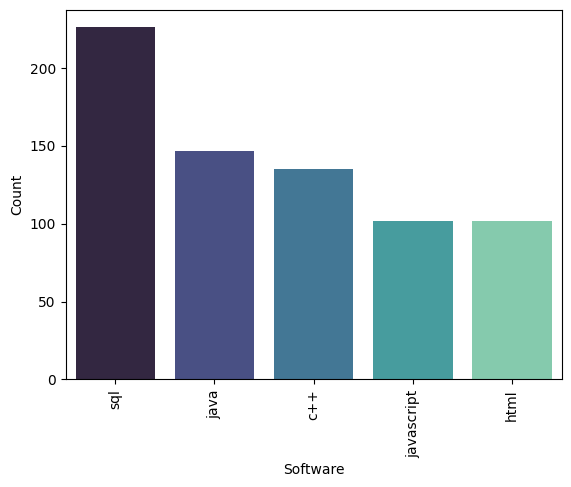

In [158]:
from collections import Counter
software_counter = Counter(software_corpus)
top_software_df = pd.DataFrame(software_counter.most_common(5), columns=['Software', 'Count'])

# Use seaborn barplot to plot the data
sns.barplot(x='Software', y='Count', data=top_software_df, palette='mako')
plt.xticks(rotation='vertical')
plt.show()

For the role of a software developer/software engineer top 5 requrired skills are
1.sql
2.java
3.c++
4.javascript
6.html

# Q2)Which job title requires ‘Python’ as the highly sought after skill?

In [140]:
python_corpus = []
for msg in python_df['job_titles'].tolist():
    for word in msg.split(sep=','):
        python_corpus.append(word)

In [147]:
python_corpus = ['software engineer' if item == 'software engineer]' else item for item in python_corpus]
python_corpus = ['software developer' if item == 'software developer]' else item for item in python_corpus]
python_corpus = ['intern' if item == 'intern]' else item for item in python_corpus]
python_corpus = ['intern' if item == 'summer intern]' else item for item in python_corpus]

print(python_corpus)


['[sr. sre', 'senior site reliability engineer', 'implementation and off site engineer', 'sre', 'sr. engineer - production operation', 'team lead - it]', '[devops ii', 'devops ', 'devops engineer]', '[data analyst', 'freelance writer', 'analytics intern]', '[senior manager', 'engineering leader', 'founder', 'senior project lead', 'associate software engineer', 'senior technical program manager]', '[digital marketing intern', 'business analyst - monetisation', 'system engineer', 'assistant manager]', '[engineer 2', 'software engineering trainee', 'sde ii', 'summer intern', 'software engineer', '[student', 'lead backend engineer', 'sde iv', 'engineering lead', 'intern', 'software engineer', 'software developer', 'co-founder]', '[software engineer i a', 'r&d internship', 'sr tech associate', 'senior software engineer]', '[software engineer intern', 'head of public relations', 'public relations executive', 'sde1]', '[geographic information systems engineer', 'freelance', 'data science inte

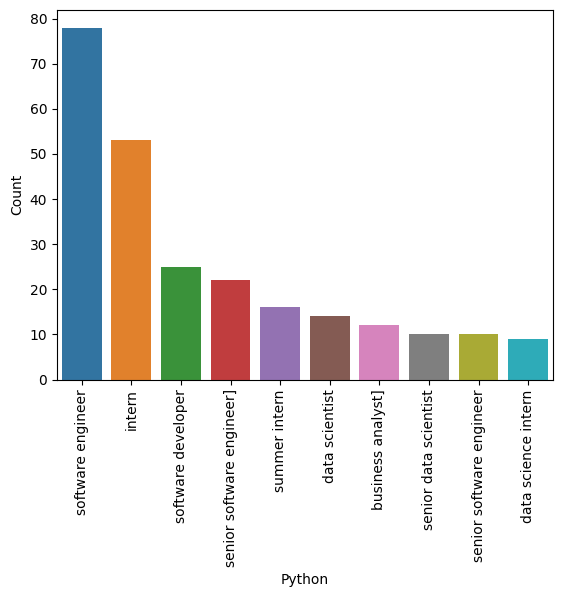

In [148]:
python_counter = Counter(python_corpus)

top_python_df = pd.DataFrame(python_counter.most_common(10), columns=['Python', 'Count'])

sns.barplot(x='Python', y='Count', data=top_python_df)
plt.xticks(rotation='vertical')
plt.show()

Here we can see that for Software Engineer, intern,developer, data scientist python is more important

# Q3)What are other most popular skills for a professional who knows ‘react.js’

In [106]:
react_corpus = []
for msg in react_df['skills'].tolist():
    for word in msg.split(sep=','):
        react_corpus.append(word)

                          React  Count
0                      react.js     46
1                    javascript     41
2                          html     33
3  cascading style sheets (css)     31
4                           c++     30


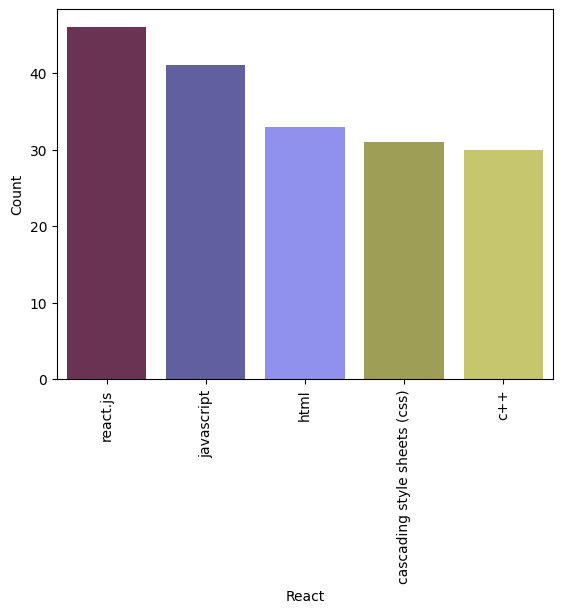

In [107]:
react_counter = Counter(react_corpus)

# Convert the counter to a DataFrame and select the top 5 most common elements
top_react_df = pd.DataFrame(react_counter.most_common(5), columns=['React', 'Count'])

# Print the DataFrame to check the data
print(top_react_df)

# Use seaborn barplot to plot the data
sns.barplot(x='React', y='Count', data=top_react_df, palette='gist_stern')
plt.xticks(rotation='vertical')
plt.show()

                          React  
                      react.js     
                    javascript     
                          html     
  cascading style sheets (css)     
                          c++     this are the most popular skills who knows react.js

In [108]:
most_common_job_title = df['job_titles'].explode().value_counts().idxmax()
print("The most common job title in the dataset is:", most_common_job_title)

The most common job title in the dataset is: [software engineer]
